In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('dataset/train-1.csv')

In [10]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

# Arquitectura de la Red Neuronal

Nuestra red neuronal (NN) tendrá una arquitectura simple de dos capas:

1. **Capa de entrada $a^{[0]}$**  
   - Tendrá $784$ unidades, correspondientes a los $784$ **píxeles** de cada imagen de entrada de $28x28$.

2. **Capa oculta $a^{[1]}$**  
   - Tendrá **10 unidades**.  
   - Usará **activación ReLU**.

3. **Capa de salida $a^{[2]}$**  
   - Tendrá $10$ unidades, correspondientes a las diez clases de dígitos.  
   - Usará activación **softmax**.




In [11]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.2, 600)

Iteration:  0
[6 6 6 ... 6 6 6] [4 5 9 ... 1 6 8]
0.08573170731707318
Iteration:  10
[6 7 6 ... 7 2 7] [4 5 9 ... 1 6 8]
0.1714878048780488
Iteration:  20
[0 7 6 ... 7 2 7] [4 5 9 ... 1 6 8]
0.2802926829268293
Iteration:  30
[0 7 6 ... 1 2 6] [4 5 9 ... 1 6 8]
0.34363414634146344
Iteration:  40
[6 7 6 ... 1 2 8] [4 5 9 ... 1 6 8]
0.39007317073170733
Iteration:  50
[6 7 6 ... 1 2 8] [4 5 9 ... 1 6 8]
0.42453658536585365
Iteration:  60
[6 7 7 ... 1 2 8] [4 5 9 ... 1 6 8]
0.4551219512195122
Iteration:  70
[6 7 7 ... 1 6 8] [4 5 9 ... 1 6 8]
0.49204878048780487
Iteration:  80
[6 7 7 ... 1 6 8] [4 5 9 ... 1 6 8]
0.546
Iteration:  90
[6 7 7 ... 1 6 8] [4 5 9 ... 1 6 8]
0.6083414634146341
Iteration:  100
[6 9 7 ... 1 6 8] [4 5 9 ... 1 6 8]
0.6462926829268293
Iteration:  110
[6 9 7 ... 1 6 8] [4 5 9 ... 1 6 8]
0.6722439024390244
Iteration:  120
[6 9 7 ... 1 6 8] [4 5 9 ... 1 6 8]
0.6920487804878048
Iteration:  130
[6 9 7 ... 1 2 8] [4 5 9 ... 1 6 8]
0.7069756097560975
Iteration:  140
[4 9 7 ..

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


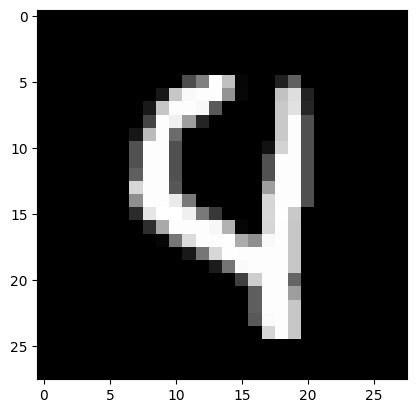

Prediction:  [4]
Label:  5


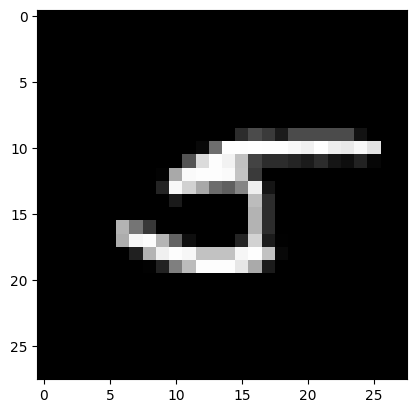

Prediction:  [9]
Label:  9


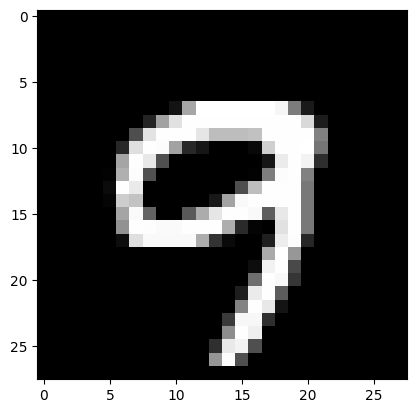

Prediction:  [6]
Label:  6


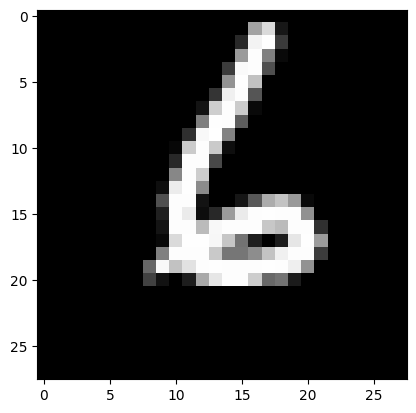

In [15]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [16]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 6 4 3 6 0 8 8 7 9 0 6 9 7 2 9 8 8 6 8 9 8 7 1 0 2 3 8 6 4 7 1 4 7 2 4 0
 8 9 3 3 7 9 8 6 2 9 8 8 1 1 4 4 2 5 9 1 0 0 7 3 0 8 6 3 0 1 9 5 0 0 5 2 6
 2 3 7 9 7 1 9 3 1 6 9 6 1 7 6 6 7 6 0 9 8 8 8 8 0 8 9 8 9 8 6 7 4 1 0 2 9
 7 9 5 3 6 5 9 2 9 4 1 4 7 7 1 6 7 8 8 1 4 6 5 8 4 5 4 2 9 9 6 2 7 0 2 0 9
 3 1 0 5 4 7 9 6 2 3 2 1 9 7 3 2 7 8 8 4 2 2 9 8 6 0 6 1 9 4 3 2 2 9 0 5 1
 2 5 6 3 5 4 4 2 8 1 8 5 3 3 9 0 6 6 8 4 7 7 0 4 1 3 9 7 3 1 8 5 3 0 4 9 6
 5 2 8 3 7 5 6 4 1 7 0 5 0 2 5 6 5 3 2 9 8 4 8 9 6 0 6 3 3 8 6 6 4 9 4 4 9
 9 0 7 7 2 7 0 4 1 2 0 9 9 6 7 4 1 6 2 5 5 8 8 3 2 4 2 4 8 3 5 8 4 6 6 4 4
 4 4 1 3 2 1 2 4 7 9 6 6 1 1 4 1 6 8 9 7 6 7 6 8 2 4 8 3 8 0 1 5 8 2 4 0 2
 2 3 0 9 8 3 9 7 8 3 7 5 8 6 0 8 5 0 9 9 9 4 5 7 0 1 4 5 9 8 0 7 9 9 4 3 8
 2 9 5 3 4 8 7 3 8 0 3 0 6 3 6 8 3 3 3 2 7 8 9 1 2 4 0 0 5 2 6 4 6 1 4 9 5
 3 5 2 7 1 3 8 1 3 7 8 7 5 9 7 2 6 8 7 9 3 3 4 2 5 1 0 9 7 9 9 5 9 4 9 3 6
 1 3 6 4 2 1 4 9 9 4 5 1 5 7 3 3 0 0 7 9 6 7 4 6 1 7 3 4 1 7 4 7 0 7 9 4 0
 9 3 3 4 6 3 2 3 5 7 7 1 

0.852